<a id="1"></a> <br>
# Giriş
* **Deep learning:** Özellikleri doğrudan verilerden öğrenen makine öğrenme tekniklerinden biridir.. 
* **Neden deep learning:** Veri miktarı arttığında makine öğrenme teknikleri performans açısından yetersiz kalıyor ve derin öğrenme daha iyi performans veriyor..

<a href="http://ibb.co/m2bxcc"><img src="http://preview.ibb.co/d3CEOH/1.png" alt="1" border="0"></a>

* **Derin öğrenmenin makine öğreniminden farkı nedir:** 
    * Makine öğrenimi derin öğrenmeyi kapsar.
    * Derin öğrenme, özellikleri doğrudan verilerden öğrenir.
    
<a href="http://ibb.co/f8Epqx"><img src="http://preview.ibb.co/hgpNAx/2.png" alt="2" border="0"></a>


In [11]:
import numpy as np # lineer Cebir
import pandas as pd # veri işleme, CSV dosyası G/Ç (ör. pd.read_csv)
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore') # filtre uyarıları

<a id="Overview the Data Set"></a>
# Veri Kümesine Genel Bakış
* "işaret dili rakamları veri seti" kullanacağız.
* Bu verilerde 2062 işaret dili hanesi görseli bulunmaktadır.
* 10 benzersiz işaret vardır.
* Sadece 0 ve 1 işaretlerini kullanacağız.
* Verilerde sıfır işareti 204 ve 408 indeksleri arasındadır. Sıfır işareti sayısı 205'tir.
* Ayrıca 1 işareti 822 ve 1027 dizinleri arasındadır. Bir işaretin sayısı 206'dır. Bu nedenle, her sınıftan (etiketlerden) 205 örnek kullanacağız.

(-0.5, 63.5, 63.5, -0.5)

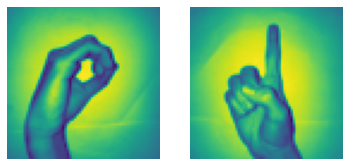

In [12]:
# veri seti yükle
x_l = np.load('X.npy')
Y_l = np.load('Y.npy')
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')

* Görüntü dizisi oluşturmak için sıfır işaretli ve tek işaretli dizileri birleştirilir
* Ardından sıfır işaretli görüntüler için 0 ve tek işaretli görüntüler için 1 etiket dizisi oluşturulur

In [13]:
# Bir satır ekseni boyunca bir dizi diziye katılın.
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0) # 0'dan 204'e sıfır işareti ve 205'den 410'a bir işarettir 
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


* X'in şekli (410, 64, 64)
    * 410, 410 resmimiz olduğu anlamına gelir (sıfır ve bir işaret)
    * 64, resim boyutumuzun 64x64 (64x64 piksel) olduğu anlamına gelir.
* Y'nin şekli (410,1)'dir.
    * 410, 410 etiketimiz olduğu anlamına gelir (0 ve 1)
* X ve Y'yi train ve test setlerine ayıralım.
    * test_size = test boyutunun yüzdesi. test = %15 ve eğitim = %75
    * random_state = rastgeleleştirme sırasında aynı çekirdeği kullanın. Bunun anlamı, tekrar tekrar train_test_split çağırırsak, aynı rastgele_duruma sahip olduğumuz için her zaman aynı tren ve test dağılımını yaratır.

In [14]:
# Ardından x_train, y_train, x_test, y_test dizileri oluşturalım
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

* Şimdi 3 boyutlu girdi dizimiz (X) var, bu yüzden ilk derin öğrenme modelimiz için girdi olarak kullanmak için onu düzleştirmemiz (2D) gerekiyor.
* Etiket dizimiz (Y) zaten düz(2D) olduğundan böyle bırakıyoruz.
* X dizisini düzleştirmeye izin verir(görüntü dizisi).


In [15]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


* Gördüğünüz gibi elimizde 348 resim var ve resim train dizisinde her resim 4096 piksele sahip.
* Ayrıca, 62 resmimiz var ve her resimde görüntü test dizisinde 4096 piksel var.
* O zaman transpoze alalım. 

In [16]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


<font color='purple'>
Bu noktaya kadar yaptıklarımız:
* Sıfır ve bir işaretli etiketlerimizi (sınıfları) seçin
* Train ve test setleri oluşturun ve düzleştirin
* Son girdilerimiz(resimler) ve çıktılarımız(etiketler veya sınıflar) şöyle görünür:
<a href="http://ibb.co/bWMK7c"><img src="http://image.ibb.co/fOqCSc/3.png" alt="3" border="0"></a>

<a id="3"></a> <br>
# Lojistik regresyon
* İkili sınıflandırma(0 ve 1 çıkış) denilince akla ilk gelen lojistik regresyondur.
* Lojistik regresyon aslında çok basit bir sinir ağıdır. Sinir ağı ve derin öğrenme aynı şeydir. 

<a id="4"></a> <br>
##  Hesaplama Grafiği
* Hesaplama grafikleri, matematiksel ifadeler hakkında düşünmenin güzel bir yoludur.
* Matematiksel ifadelerin görselleştirilmesi gibidir.
* Örneğin bizde $$c = \sqrt{a^2 + b^2}$$
<a href="http://imgbb.com/"><img src="http://image.ibb.co/hWn6Lx/d.jpg" alt="d" border="0"></a>

* Lojistik regresyon hesaplama grafiği
<a href="http://ibb.co/c574qx"><img src="http://preview.ibb.co/cxP63H/5.jpg" alt="5" border="0"></a>
   * Parametreler ağırlık ve sapmadır.
    * Ağırlıklar: her pikselin katsayıları
    * Önyargı: müdahale
    * z = (w.t)x + b => z eşittir (ağırlıkların devrik x girdisi) + yanlılık
    * Başka bir deyişle => z = b + px1*w1 + px2*w2 + ... + px4096*w4096
    * y_head = sigmoid(z)
    * Sigmoid işlevi, z'yi sıfır ile bir arasında yapar, yani olasılıktır. Hesaplama grafiğinde sigmoid fonksiyonunu görebilirsiniz.
* Neden sigmoid fonksiyonunu kullanıyoruz?
    * Olasılıksal sonuç verir
    * Türev olduğu için gradyan iniş algoritmasında kullanabiliriz.
* Örnek yapalım:
    * Diyelim ki z = 4'ü bulduk ve z'yi sigmoid fonksiyonuna koyduk. Sonuç (y_head) neredeyse 0,9'dur. Bu, sınıflandırma sonucumuzun %90 olasılıkla 1 olduğu anlamına gelir.

<a id="5"></a> <br>
## Parametreleri başlatma
* Bildiğiniz gibi girdi, 4096 piksele sahip resimlerimizdir (her resim x_train'de).
* Her pikselin kendi ağırlığı vardır.
* İlk adım, her pikseli kendi ağırlıklarıyla çarpmaktır.
* Soru şu ki, ağırlıkların başlangıç ​​değeri nedir?
    * Ağırlıklar 0,01 ama ağırlık dizisi şekli nedir? 
    * Ayrıca ilk sapma 0'dır.

In [17]:
def dummy(parameter):
    dummy_parameter = parameter + 5
    return dummy_parameter
result = dummy(3)     # result = 8

# parametreleri başlatalım
# İhtiyacımız olan şey, başlatma yöntemimiz(def) için parametre olarak piksel sayısı olan 4096 boyutudur.
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

<a id="6"></a> <br>
## İleri Yayılım
* Pikselden maliyete kadar olan tüm adımlara ileriye doğru yayılma denir.
    * z = (w.T)x + b => bu denklemde piksel dizisi olan x'i biliyoruz, w (ağırlıklar) ve b (önyargı) biliyoruz, gerisi hesaplama. (T devriktir)
    * Sonra z'yi y_head(olasılık) döndüren sigmoid işlevine koyarız. Ayrıca sigmoid fonksiyonunun denklemi hesaplama grafiğindedir.
    * Ardından kayıp(hata) fonksiyonunu hesaplıyoruz.
    * Maliyet fonksiyonu tüm kayıpların(hataların) toplamıdır.
    * z ile başlayalım ve z'yi giriş parametresi olarak alan ve y_head(olasılık) döndüren yazma sigmoid tanımı(yöntemi) ile başlayalım.

In [18]:
# z'nin hesaplanması
# z = np.dot(w.T,x_train)+b
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head
#y_head = sigmoid(z)

* Sigmoid yöntemini yazıp y_head'i hesaplarken. Kayıp(hata) fonksiyonunun ne olduğunu öğrenelim
* Örnek yapalım, girdi olarak bir resim koyduk, sonra ağırlıkları ile çarpıp bias terimi ekledik, böylece z'yi bulduk. Sonra z'yi sigmoid yöntemine koyun, böylece y_head'i buluruz. Sonra örneğin y_head, 0,5'ten büyük olan 0,9 oldu, bu nedenle tahminimiz görüntü, bir görüntünün işaretlenmesidir. Cevap, kayıp (hata) işleviyle:
    * Log kaybı(hata) fonksiyonunun matematiksel ifadesi şudur:
    ![Time](duzeltme.jpg)
    *Yanlış tahmin yaparsanız kayıp(hata) büyür diyor.**DENKLEM DÜZELTİLDİ.**
        * Örnek: gerçek görüntümüz işaret 1 ve etiketi 1 (y = 1), o zaman y_head = 1 tahminini yapıyoruz. y ve y_head'i kayıp(hata) denklemine koyduğumuzda sonuç 0 oluyor. Bu nedenle doğru tahmin yapıyoruz. kaybımız 0'dır. Ancak y_head = 0 gibi yanlış tahmin yaparsak, kayıp(hata) sonsuz olur.
* Bundan sonra maliyet fonksiyonu, kayıp fonksiyonunun toplamıdır. Her görüntü kayıp fonksiyonu oluşturur. Maliyet fonksiyonu, her bir girdi görüntüsü tarafından oluşturulan kayıp fonksiyonlarının toplamıdır.

In [19]:
# İleri yayılma adımları:
# find z = w.T*x+b
# y_head = sigmoid(z)
# loss(error) = loss(y,y_head)
# cost = sum(loss)
def forward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1] ölçeklendirme içindir
    return cost 

<a id="7"></a> <br>
##  Gradient Descent ile Optimizasyon Algoritması
* Hata olan cost değerinin ne olduğunu biliyoruz.
* Bu nedenle cost değerini düşürmemiz gerekiyor çünkü cost değerinin yüksek olduğunu bildiğimiz için yanlış tahmin yapıyoruz.
* Cost değerini düşürmek için ağırlıkları ve yanlılığı güncellememiz gerekiyor.
* Başka bir deyişle, modelimizin cost değerinin fonksiyonunu en aza indiren parametrelerin ağırlıklarını ve yanlılığını öğrenmesi gerekiyor. Bu tekniğe gradyan inişi denir.
* Bir örnek yapalım:
    * w = 5 ve önyargı = 0'a sahibiz (bu nedenle şimdilik önyargıyı göz ardı edin). Sonra ileriye yayılım yapıyoruz ve cost değeri fonksiyonumuz 1.5.
    * Şuna benziyor. (kırmızı Hat)
    <a href="http://imgbb.com/"><img src="http://image.ibb.co/dAaYJH/7.jpg" alt="7" border="0"></a>
    * Grafikten de anlaşılacağı üzere cost değeri fonksiyonunda minimum noktada değiliz. Bu nedenle minimum cost değerine geçmemiz gerekiyor. Ağırlığı güncelleyelim. ( := sembolü güncelleniyor)
    * w := w - adım. Adım eğim1'dir. Minimum noktayı bulmak için eğim1'i kullanabiliriz. O zaman eğim1 = 3 diyelim ve ağırlığımızı güncelleyelim. w := w - eğim1 => w = 2.
    * Şimdi w ağırlığımız 2'dir. İleri yayılımlı cost değeri fonksiyonunu bulmamız gerekiyor.
    * Diyelim ki w = 2 ile ileriye doğru yayılıma göre cost değeri fonksiyonu 0,4. Cost değeri fonksiyonumuz düştüğü için doğru yoldayız. Cost değeri fonksiyonu için cost değeri = 0.4 olan yeni bir değerimiz var. 
    * Slope2 = 0.7 ve w = 2. w : = w - step(slope2) => w = 1.3 olan yeni ağırlığı güncelleyelim. O halde yeni cost değerini bulalım.
    * w = 1.3 ve cost değerimiz = 0.3 ile bir ileri yayılım daha yapın. 
    * Eğim3 ​​= 0,01 ve w = 1,3. Ağırlık güncelleme w := w - adım(eğim3) => w = 1.29 ~ 1.3. Yani ağırlık değişmez çünkü cost değeri fonksiyonunun minimum noktasını buluruz.
    <a href="http://imgbb.com/"><img src="http://image.ibb.co/hYTTJH/8.jpg" alt="8" border="0"></a>
    * Öğrenme oranını çok basit bir terimdir. Ancak hızlı öğrenmek ve asla öğrenmemek arasında bir ödünleşim vardır. Örneğin, Paris'tesiniz (cari maliyet) ve Madrid'e gitmek istiyorsunuz (asgari maliyet). Hızınız (öğrenme oranınız) düşükse Madrid'e çok yavaş gidebilirsiniz ve çok uzun zaman alır. Öte yandan, hızınız (öğrenme oranınız) büyükse çok hızlı gidebilirsiniz ama belki kaza yaparsınız ve Madrid'e asla gidemezsiniz. Bu nedenle hızımızı (öğrenme oranımızı) akıllıca seçmemiz gerekiyor.
    * Öğrenme hızı, seçilmesi ve ayarlanması gereken hiperparametre olarak da adlandırılır. Diğer hiperparametreler ile yapay sinir ağlarında daha detaylı anlatacağım. Şimdilik, önceki örneğimiz için öğrenme oranının 1 olduğunu söyleyin.
  
$$ \frac{\partial J}{\partial w} = \frac{1}{m}x(  y_head - y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (y_head-y)$$

In [20]:
# Geriye yayılımda, ileriye doğru yayılmada bulunan y_head'i kullanacağız.
# Bu nedenle geriye yayılım yöntemi yazmak yerine, ileriye doğru yayılım ile geriye doğru yayılımı birleştirelim.
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1]  ölçeklendirme içindir
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] # x_train.shape[1]  ölçeklendirme içindir
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 # x_train.shape[1]  ölçeklendirme içindir
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [21]:
# Güncelleme(öğrenme) parametreleri
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    # güncelleme(öğrenme) parametresi number_of_iterarion defadır
    for i in range(number_of_iterarion):
        # ileri ve geri yayılım yapın ve cost değerleri ve gradyanları bulun
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # güncelleyelim
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    # parametrelerin ağırlıklarını ve yanlılığını güncelliyoruz
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list
#parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate = 0.009,number_of_iterarion = 200)

In [22]:
 # tahmin
def predict(w,b,x_test):
    # x_test, ileri yayılma için bir girdidir
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # z 0,5'ten büyükse, tahminimiz işaret 1 (y_head=1),
    # z 0,5'ten küçükse, tahminimiz sıfır işaretidir (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction
# predict(parameters["weight"],parameters["bias"],x_test)

Cost after iteration 0: 14.014222
Cost after iteration 10: 2.544689
Cost after iteration 20: 2.577950
Cost after iteration 30: 2.397999
Cost after iteration 40: 2.185019
Cost after iteration 50: 1.968348
Cost after iteration 60: 1.754195
Cost after iteration 70: 1.535079
Cost after iteration 80: 1.297567
Cost after iteration 90: 1.031919
Cost after iteration 100: 0.737019
Cost after iteration 110: 0.441355
Cost after iteration 120: 0.252278
Cost after iteration 130: 0.205168
Cost after iteration 140: 0.196168


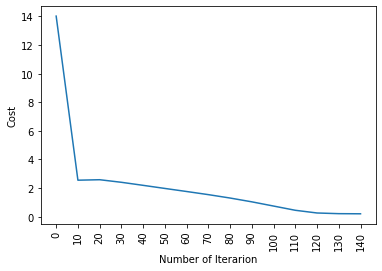

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %


In [23]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # başlatmak
    dimension =  x_train.shape[0]  # that is 4096
    w,b = initialize_weights_and_bias(dimension)
    # öğrenme oranını değiştirmeyin
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    # Train/test Hatalarını yazdır
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 150)

<a id="8"></a> <br>
## Sklearn ile Lojistik Regresyon
* Sklearn kütüphanesinde, lojistik regresyon uygulamasını kolaylaştıran bir lojistik regresyon yöntemi vardır.
* Doğruluklar bulduklarımızdan farklıdır. Çünkü lojistik regresyon yöntemi, farklı optimizasyon parametreleri veya düzenlileştirme gibi kullanmadığımız birçok farklı özelliği kullanır.
* Lojistik regresyon için bir sonuç çıkaralım ve yapay sinir ağı ile devam edelim.

In [24]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(random_state = 42,max_iter= 150)
print("test accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_test.T, y_test.T)))
print("train accuracy: {} ".format(logreg.fit(x_train.T, y_train.T).score(x_train.T, y_train.T)))

test accuracy: 0.967741935483871 
train accuracy: 1.0 


<a id="10"></a> <br>
# Yapay Sinir Ağı (YSA)
* Derin sinir ağı veya derin öğrenme olarak da adlandırılır.
* **Sinir ağı nedir:** Temel olarak lojistik regresyon alıp en az 2 kez tekrar etmektir.
* Lojistik regresyonda girdi ve çıktı katmanları vardır. Ancak yapay sinir ağlarında giriş ve çıkış katmanı arasında en az bir gizli katman vardır.
* 2 katmanlı sinir ağını görelim:
<a href="http://ibb.co/eF315x"><img src="http://preview.ibb.co/dajVyH/9.jpg" alt="9" border="0"></a>
* Adım adım bu görseli öğreneceğiz.
    * Görüldüğü gibi giriş ve çıkış katmanları arasında bir adet gizli katman bulunmaktadır. Ve bu gizli katmanın 3 düğümü vardır. Düğüm sayısı, öğrenme oranı gibi bir hiper parametredir. Bu nedenle yapay sinir ağının sonunda hiperparametreler göreceğiz.
    * Giriş ve çıkış katmanları değişmez. Lojistik regresyon gibi aynılar.
    * Görselde bilinmeyen bir tanh fonksiyonu var. Sigmoid fonksiyonu gibi bir aktivasyon fonksiyonudur. Tanh aktivasyon fonksiyonu, gizli birimler için sigmoidden daha iyidir çünkü çıktısının ortalaması sıfıra yakındır, bu nedenle verileri bir sonraki katman için daha iyi ortalar. Ayrıca tanh aktivasyon fonksiyonu, modelimizin daha iyi öğrenmesine neden olan doğrusal olmayanlığı arttırır.
    * Mor renk ile gördüğünüz gibi iki kısım var. Her iki kısım da lojistik regresyon gibidir. Tek fark aktivasyon fonksiyonu, girişler ve çıkışlardır.
        * Lojistik regresyonda: girdi => çıktı
        * 2 katmanlı sinir ağında: girdi => gizli katman => çıktı. Gizli katmanın 1. bölümün çıktısı ve 2. bölümün girişi olduğunu düşünebilirsiniz.

<a id="11"></a> <br>
## 2 Katmanlı Sinir Ağı
* Katmanların boyutu ve başlangıç ​​parametreleri ağırlıkları ve yanlılığı
* İleri yayılma
* Kayıp fonksiyonu ve Cost değeri fonksiyonu
* Geriye yayılma
* Parametreleri Güncelle
* Öğrenilmiş parametreler ağırlık ve önyargı ile tahmin
* Model Oluştur

<a id="12"></a> <br>
## Katmanların boyutu ve başlatma parametreleri ağırlıkları ve yanlılığı
* 348 örneği olan x_train için $x^{(348)}$:
$$z^{[1] (348)} =  W^{[1]} x^{(348)} + b^{[1] (348)}$$ 
$$a^{[1] (348)} = \tanh(z^{[1] (348)})$$
$$z^{[2] (348)} = W^{[2]} a^{[1] (348)} + b^{[2] (348)}$$
$$\hat{y}^{(348)} = a^{[2] (348)} = \sigma(z^{ [2] (348)})$$

* Lojistik regresyonda, 0,01 ağırlıkları ve 0 önyargısını başlatırız. Bu sırada, ağırlıkları rastgele başlatırız. Çünkü parametreleri sıfırlarsak, ilk gizli katmandaki her nöron aynı hesaplamayı yapacaktır. Bu nedenle, birden fazla dereceli iniş yinelemesinden sonra bile, katmandaki her bir nöron, diğer nöronlarla aynı şeyleri hesaplayacaktır. Bu nedenle rastgele başlatıyoruz. Ayrıca ilk ağırlıklar küçük olacaktır. Başlangıçta çok büyüklerse, bu, tanh girdilerinin çok büyük olmasına ve dolayısıyla gradyanların sıfıra yakın olmasına neden olur. Optimizasyon algoritması yavaş olacaktır.
* Önyargı başlangıçta sıfır olabilir.

In [32]:
# parametreleri ve katman boyutlarını başlat
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

<a id="13"></a> <br>
## İleri yayılma
* İleriye yayılma, lojistik regresyon ile hemen hemen aynıdır.
* Tek fark tanh fonksiyonunu kullanmamız ve tüm işlemleri iki kez yapmamızdır.
* Ayrıca numpy'nin tanh işlevi vardır. Yani uygulamamıza gerek yok.

In [33]:

def forward_propagation_NN(x_train, parameters):

    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache


<a id="14"></a> <br>
## Kayıp fonksiyonu ve Cost değeri fonksiyonu
* Kayıp ve cost değeri fonksiyonları lojistik regresyon ile aynıdır.
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small $$

In [34]:
# hesaplanan cost değeri
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost


<a id="15"></a> <br>
## Geriye yayılma
* Bildiğiniz gibi geriye doğru yayılma türev demektir.

In [35]:
# Geriye Yayılım
def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

<a id="16"></a> <br>
## Parametreleri Güncelle
* Lojistik regresyon ile aynı parametrelerin güncellenmesi.

In [36]:
# Parametreleri güncelle
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["dbias2"]}
    
    return parameters

<a id="17"></a> <br>
## Öğrenilmiş parametreler ağırlık ve yanlılık ile tahmin
* Lojistik regresyona benzer bir tahmin metodu yazalım.

In [37]:
# tahmin
def predict_NN(parameters,x_test):
    # x_test, ileri yayılma için bir girdidir
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # z 0,5'ten büyükse, tahminimiz işaret 1 (y_head=1),
    # z 0,5'ten küçükse, tahminimiz sıfır işaretidir (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

<a id="18"></a> <br>
## Model Oluştur
* Hepsini bir araya getirelim

Cost after iteration 0: 0.284060
Cost after iteration 100: 0.302972
Cost after iteration 200: 0.276550
Cost after iteration 300: 0.237649
Cost after iteration 400: 0.197097
Cost after iteration 500: 0.161778
Cost after iteration 600: 0.133240
Cost after iteration 700: 0.110683
Cost after iteration 800: 0.093309
Cost after iteration 900: 0.079819
Cost after iteration 1000: 0.069057
Cost after iteration 1100: 0.060275
Cost after iteration 1200: 0.053018
Cost after iteration 1300: 0.046995
Cost after iteration 1400: 0.041991
Cost after iteration 1500: 0.037822
Cost after iteration 1600: 0.034329
Cost after iteration 1700: 0.031381
Cost after iteration 1800: 0.028874
Cost after iteration 1900: 0.026723
Cost after iteration 2000: 0.024865
Cost after iteration 2100: 0.023246
Cost after iteration 2200: 0.021826
Cost after iteration 2300: 0.020569
Cost after iteration 2400: 0.019445


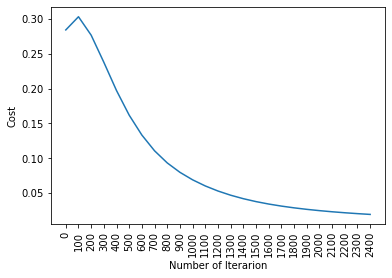

train accuracy: 100.0 %
test accuracy: 91.93548387096774 %


In [38]:
# 2 - Katmanlı sinir ağı
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    # parametreleri ve katman boyutlarını başlat
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
         # ileri yayılma
        A2, cache = forward_propagation_NN(x_train,parameters)
        # hesaplanan cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # geriye doğru yayılma
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # parametreleri güncelle
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # tahmin etmek
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # Train/test Hatalarını yazdır
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters
parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2500)

<a id="19"></a> <br>
# L Katmanlı Sinir Ağı
* **Gizli katman sayısı artarsa ​​ne olur:** Daha önceki katmanlar basit özellikleri algılayabilir.
* Model, sinir ağının sonraki katmanlarında basit özellikleri bir araya getirirken, giderek daha karmaşık işlevleri öğrenebilir. Örneğin, bir işaretimize bakalım.
<a href="http://ibb.co/dNgDJH"><img src="http://preview.ibb.co/mpD4Qx/10.jpg" alt="10" border="0"></a>
* Örneğin ilk gizli katman, kenarları veya çizgi gibi temel şekilleri öğrenir. Katman sayısı arttığında, katmanlar dışbükey şekiller gibi daha karmaşık şeyleri veya işaret parmağı gibi karakteristik özellikleri öğrenmeye başlar.
* Modelimizi oluşturalım
    * Öğrenme hızı, iterasyon sayısı, gizli katman sayısı, gizli birim sayısı, aktivasyon fonksiyonlarının türü gibi seçmemiz gereken bazı hiperparametreler vardır.
    * Aktivasyon fonksiyonu olarak sırasıyla relu(birinci gizli katman), relu(ikinci gizli katman) ve sigmoid(çıktı katmanı) kullanacağız.
    * İterasyon sayısı 100 olacaktır.
* Önce x_train, x_test, y_train ve y_test'imizi yeniden şekillendirelim.   

In [40]:
# yeniden şekillendirme
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T